In [15]:
from pathlib import Path
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
# Read file into DataFrame
file = Path("myopia.csv")
myopia = pd.read_csv(file)
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [8]:
# Drop our target (myopic) column in order to not bias the unsupervised learning model
labels = myopia['MYOPIC']
myopia.drop('MYOPIC', axis=1).head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
from sklearn.preprocessing import StandardScaler

# standardize our data using scaler
scaler = StandardScaler()
myo_scaled = scaler.fit_transform(myopia)

In [37]:
# Apply Dimensionality Reduction
pca = PCA(n_components=0.90)
myo_pca = pca.fit_transform(myo_scaled)

# PCA converted to dataframe
df_myo_pca = pd.DataFrame(myo_pca)

# print sum of explained variance ratio
pca.explained_variance_ratio_.sum()

0.9289880687733465

In [43]:
# Run t-SNE model on our PCA output (df_myo_pca)
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_myo_pca)

In [39]:
# shape of t-SNE model
tsne_features.shape

(618, 2)

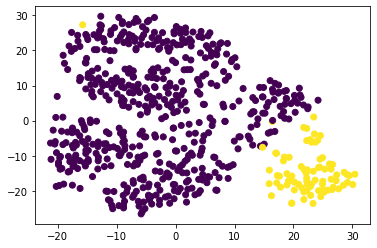

In [44]:
# Plot t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1], c=labels)
plt.show()